<h1>Handwitten digits reconigtion using neural network by tiendatdev</h1>

In [25]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import numpy as np
import  random

<h4>Load image data</h4>

load the data and check the shape of data

In [26]:
(X_train, y_train), (X_test,y_test) = keras.datasets.mnist.load_data()
X_train.shape

(60000, 28, 28)

So now we have a set of 60000 image, each image is 28*28 pixel as shown below.

Label value: 3


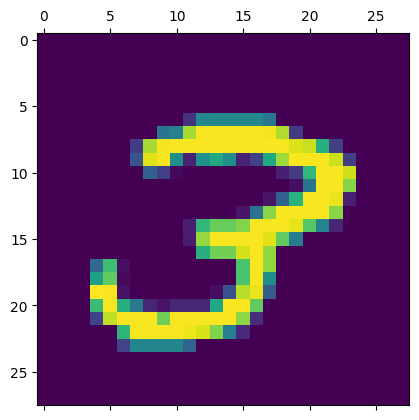

In [27]:
i = random.randint(0,1000)
plt.matshow(X_train[i])
print(f"Label value: {y_train[i]}")


below I just regularization the data to help improve the peformance of the NN so the model will be converge to the optimal minimum more quickly.

In [28]:
#regularization
X_train = X_train/255
X_test = X_test/255

Now I flatten each example of X_train, X_test to 1-dimension array that have length of 28*28 = 784 so the result can be input to the neural network

In [29]:
X_train_flattened = X_train.reshape(len(X_train),784)
X_test_flattened = X_test.reshape(len(X_test),784)
print(f"Shape of trainning sets: {X_train_flattened.shape}") 
print(f"Shape of test sets: {X_test_flattened.shape}") 



Shape of trainning sets: (60000, 784)
Shape of test sets: (10000, 784)


Now i create model with 1 hidden layer(100 neural) and out put layer with 10 neural(respectivly to ten digits)

In [30]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

model.fit(X_train_flattened,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2745 - accuracy: 0.9228
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1259 - accuracy: 0.9631
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0869 - accuracy: 0.9741
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0663 - accuracy: 0.9802
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0521 - accuracy: 0.9838
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0415 - accuracy: 0.9870
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0340 - accuracy: 0.9891
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0277 - accuracy: 0.9913
Epoch 9/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0235 - accuracy: 0.9925
Epoch 10/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.019

Here is the accuracy on the test sets

In [31]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1170 - accuracy: 0.9766


[0.11702129244804382, 0.9765999913215637]

Let print out the image, label and our predict
(you can run cell below multiple time to see that sometime this model still predict wrong)

313/313 [==============================] - 1s 2ms/step


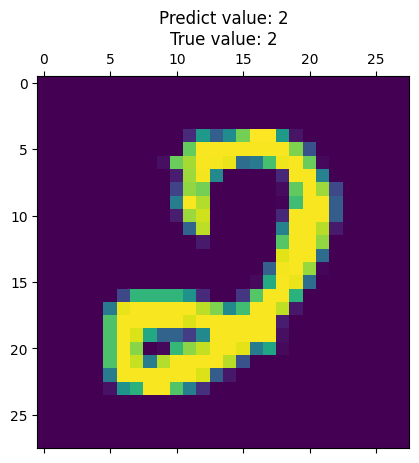

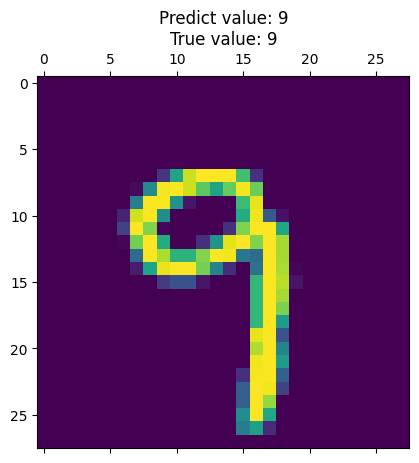

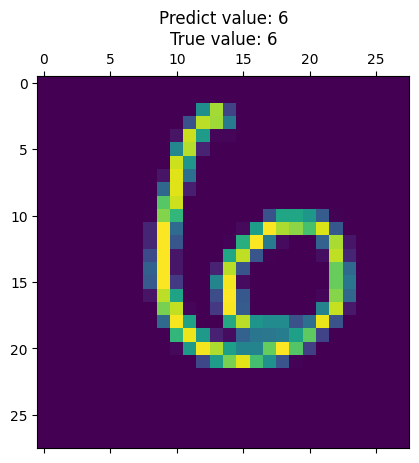

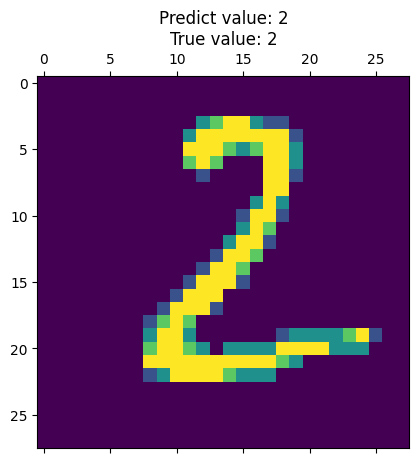

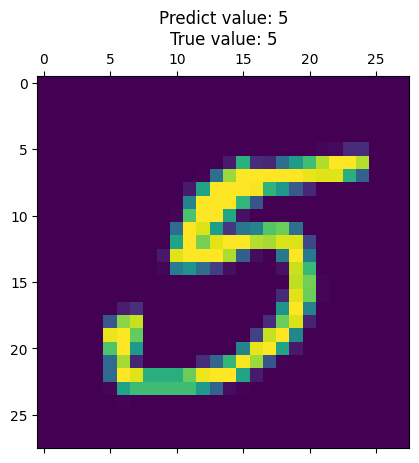

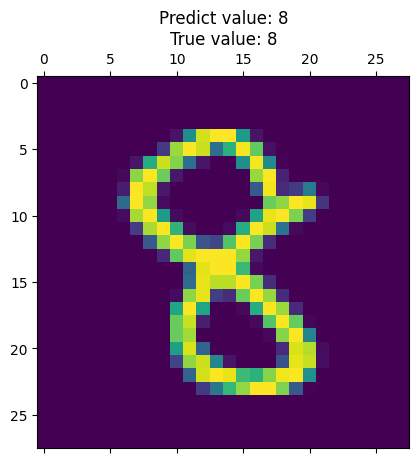

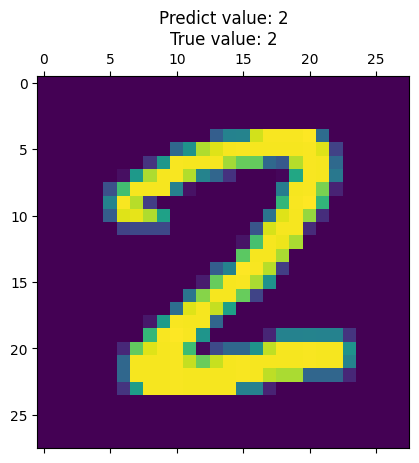

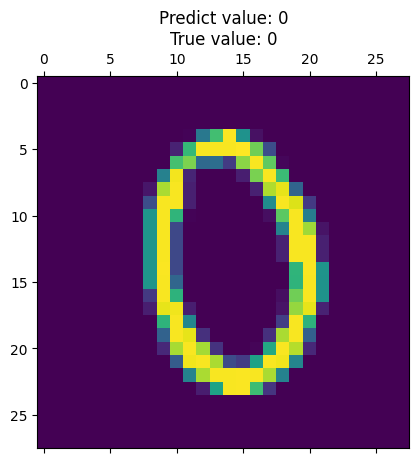

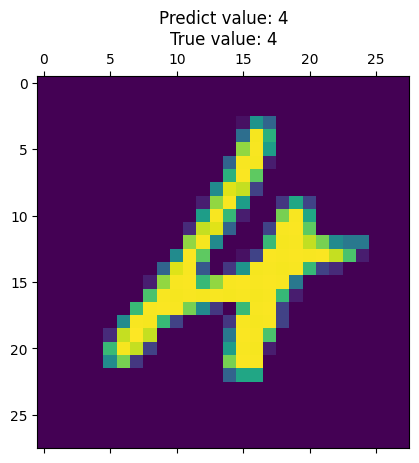

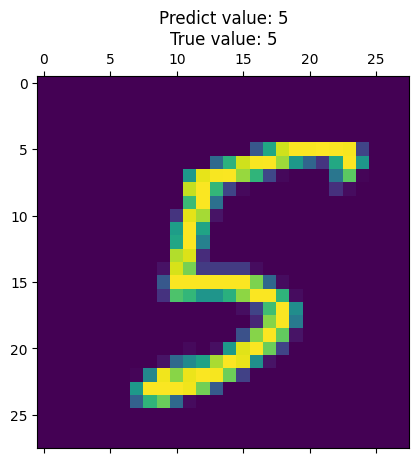

In [35]:


y_predicted = model.predict(X_test_flattened)
y_predicted_label  = [np.argmax(i)  for i in y_predicted]
for i in range(10):
    j = random.randint(1, 1000)
    plt.matshow(X_test[j])
    plt.title(f"Predict value: {y_predicted_label[j]}\nTrue value: {y_test[j]}")
    



In [33]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    1,    1,    0,    1,    3,    2,    2,    1],
       [   0, 1126,    1,    1,    0,    1,    3,    1,    2,    0],
       [   5,    3, 1007,    2,    3,    1,    2,    3,    6,    0],
       [   0,    0,    4,  992,    0,    6,    0,    2,    2,    4],
       [   1,    2,    3,    0,  961,    1,    7,    1,    1,    5],
       [   1,    0,    0,    7,    1,  875,    4,    0,    3,    1],
       [   4,    3,    1,    1,    3,   15,  930,    0,    1,    0],
       [   1,    6,   13,    8,    7,    0,    0,  982,    3,    8],
       [   0,    1,    2,    6,    2,    9,    0,    2,  951,    1],
       [   1,    3,    0,    8,   13,    4,    1,    5,    6,  968]])>

Now draw the heatmap to see how well our model really is.

Text(95.72222222222221, 0.5, 'Truth')

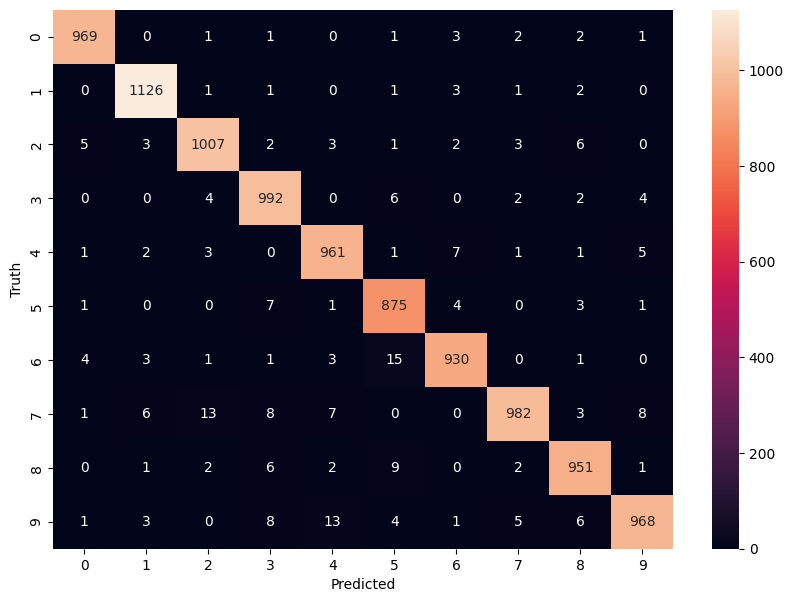

In [36]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

You can see that our model still predict wrong quite alot on image of digit 6,7,9

<h2>Thank you for taking time to look at my repo❤❤</h2>